<a href="https://colab.research.google.com/github/Warpedro1/intro_machine-learning_classification/blob/main/intro_Machine_learning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(uri)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   mileage_per_year  10000 non-null  int64  
 2   model_year        10000 non-null  int64  
 3   price             10000 non-null  float64
 4   sold              10000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


In [20]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


#Preparação de Dados I  e LinearSVC




**Abaixo estão presentes valores categóricos nominais, pois não tem um valor maior que o outro, mas apenas diferente. Geralmente deveria se utilizar o método de tratamento get_dummies, porém como so tem duas tipos de valores, sim e nçao, pode-se usar o método label encoder, que nesse caso foi implementado manualmente. O label encoder é mais recomendado para valores categóricos ordinais.**

In [21]:
trade = {
    'yes': 1,
    'no':0
}
df.sold.replace(trade, inplace =True)


In [22]:
from datetime import datetime
ano_atual = datetime.today().year
df['car_age'] = ano_atual-df['model_year']

In [23]:
df['km_per_year'] = df.mileage_per_year*1.60934


In [24]:
df.drop(columns= ['Unnamed: 0','mileage_per_year','model_year'],axis = 1, inplace = True)
df.head()

,price,sold,car_age,km_per_year
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [25]:
x = df.drop(columns = ['sold'])
y = df['sold']

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


np.random.seed(13)


train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25 )


#quando não se estabelece uma seed como parâmetro para aleatoriedade dos dados o sklearn pega a seed padrão do numpy
#assim, se vôce determinar a seed do do numpy, não será necessário ficar passando o parâmetro random_state


model = LinearSVC()
model.fit(train_x, train_y)
predicted = model.predict(test_x)

print("Taxa de acurácia: ", accuracy_score(test_y,predicted )*100)

Taxa de acurácia:  52.559999999999995


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**LEMBRE-SE, APÓS UM RESULTADO FAÇA A LINHA DE BASE PARA SE TER UM OBJETO DE COMPARAÇÃO, porém o sklearn possui um classificador simples que pode servir melhor que o np.one() chamdo DummyClassifier**

#DummyClassifier

#Preparação  II DummyClassifier and SVC

In [27]:
from sklearn.dummy import DummyClassifier

dummy_stretified = DummyClassifier()
dummy_stretified.fit(train_x,train_y)
predicted = dummy_stretified.predict(test_x)
print("Taxa de acurácia dummy_stretified: ", accuracy_score(test_y, predicted)*100)

Taxa de acurácia dummy_stretified:  57.32000000000001


DummyClassifier usa como estratégia padrão, caso nçao seja definida pelo usuário, o stretifier, que tornar as previsões em proporção com a base de treino

In [28]:
dummy_most_frequenty = DummyClassifier(strategy='most_frequent')
dummy_most_frequenty.fit(train_x,train_y)
predicted = dummy_most_frequenty.predict(test_x)
print("Taxa de acurácia dummy_most_frequenty: ", accuracy_score(test_y, predicted)*100)

#accuracy_score pode ser subtituido pelo.score dos modelos do sklearn

Taxa de acurácia dummy_most_frequenty:  57.32000000000001


O modelo DummyClassier acima foi setado para usar a estratégia most frequenty, que preve todos os dados de teste_x como o valor mais frequente na base de treino_y

In [29]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

np.random.seed(13)
raw_train_x, raw_test_x, raw_train_y, raw_test_y = train_test_split(x, y, test_size = 0.25 )

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x =  scaler.transform(raw_test_x)



#quando não se estabelece uma seed como parâmetro para aleatoriedade dos dados o sklearn pega a seed padrão do numpy
#assim, se vôce determinar a seed do do numpy, não será necessário ficar passando o parâmetro random_state


model = SVC()
model.fit(train_x, train_y)
predicted = model.predict(test_x)


print("Taxa de acurácia: ",  accuracy_score(test_y,predicted)*100)

Taxa de acurácia:  75.52


**SVC tem que normalizado antes de poderem ser treinados**

#Árvore de Decisão


**Nota-se que a árvore de decisão não necessita da padronização dos valores**

In [52]:
from sklearn.tree import DecisionTreeClassifier


np.random.seed(13)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25 )

model = DecisionTreeClassifier()
model.fit(train_x, train_y)
predicted = model.predict(test_x)


print("Taxa de acurácia: ",  accuracy_score(test_y,predicted)*100)

Taxa de acurácia:  72.68


Pela Arvore de decisão, é possível ver qual foi o processo de classificação usado pelo modelo usando uma visualização gráfica

In [46]:
from sklearn.tree import export_graphviz
#devolve o formato de um gráfico (dot_data) e não o gráfico em si
export_graphviz(model)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 59982.246\\ngini = 0.486\\nsamples = 7500\\nvalue = [3133, 4367]"] ;\n1 [label="x[0] <= 40083.385\\ngini = 0.197\\nsamples = 3299\\nvalue = [365, 2934]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1445\\nvalue = [0, 1445]"] ;\n1 -> 2 ;\n3 [label="x[0] <= 41111.666\\ngini = 0.316\\nsamples = 1854\\nvalue = [365, 1489]"] ;\n1 -> 3 ;\n4 [label="x[2] <= 28111.146\\ngini = 0.425\\nsamples = 88\\nvalue = [27, 61]"] ;\n3 -> 4 ;\n5 [label="x[0] <= 41013.545\\ngini = 0.379\\nsamples = 67\\nvalue = [17, 50]"] ;\n4 -> 5 ;\n6 [label="x[1] <= 14.5\\ngini = 0.339\\nsamples = 60\\nvalue = [13, 47]"] ;\n5 -> 6 ;\n7 [label="x[2] <= 22713.42\\ngini = 0.486\\nsamples = 12\\nvalue = [5, 7]"] ;\n6 -> 7 ;\n8 [label="x[2] <= 19761.891\\ngini = 0.5\\nsamples = 10\\nvalue = [5, 5]"] ;\n7 -> 8 ;\n9 [label="x[1] <= 13.5\\ngini = 0.469\\nsamples = 8\\n

In [51]:
import graphviz
dot_data = export_graphviz(model)
graph = graphviz.Source(dot_data)
#graph

Como o resultado foi um gráfico muito grande, é necessário alterar o um hiperparâmetro na criação do modelo

Taxa de acurácia:  75.08


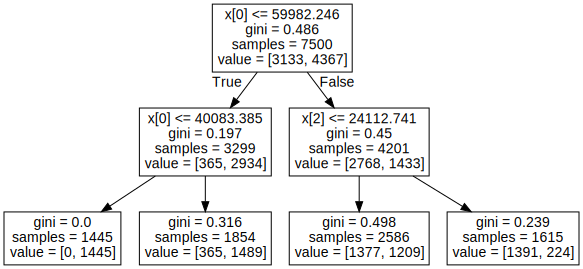

In [48]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(train_x, train_y)
predicted = model.predict(test_x)
print("Taxa de acurácia: ",  accuracy_score(test_y,predicted)*100)

dot_data = export_graphviz(model)
graph = graphviz.Source(dot_data)
graph

nota-se que até a acurácia mudou depois de estabelecer um limiter para a profundidade da árvore

Porém, nota-se que as variáveis estão com outros nomes, por exemplo x[0], então para ficar mais legível, se coloca outro hiperparâmetro --> feature_names, porém esse vai na parte de export_graphviz

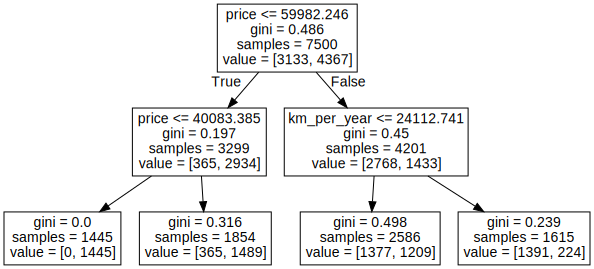

In [49]:
features = x.columns
dot_data = export_graphviz(model, feature_names = features)
graph = graphviz.Source(dot_data)
graph

Outros hiperparâmetros que podem ser adicionados para se ter uma melhor análise da árvore são o **filled**, **rounded**, **class_names**

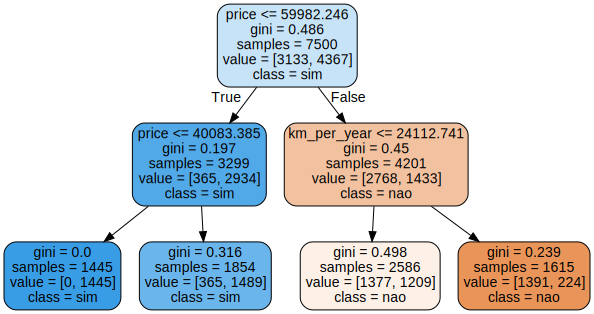

In [50]:
features = x.columns
dot_data = export_graphviz(model, feature_names = features, out_file = None, filled = True, rounded = True, class_names= ['nao', 'sim'])
graph = graphviz.Source(dot_data)
graph



*   A tonalidade (**filled**) dos nós estão representado as chances de serem pertecerem a classe indicada
*   **Samples** indica quatos dados eles esta analisando em cada ó
*   Item da lista
*   Item da lista


